In [1]:
import random 
import numpy as np 
from deap import base, creator, tools, algorithms 
import matplotlib.pyplot as plt 


In [2]:
def rastrigin(individual): 
    A = 10 
    n = len(individual) 
    return A * n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual]), 
DIMENSIONS = 5  # Number of input variables 
 
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # Minimize 
creator.create("Individual", list, fitness=creator.FitnessMin) 
 

In [3]:

toolbox = base.Toolbox() 
 
# A ribute generator 
toolbox.register("attr_float", random.uniform, -5.12, 5.12) 
 
# Structure ini alizers 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=DIMENSIONS ) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
 
# Gene c operators 
toolbox.register("evaluate", rastrigin) 
toolbox.register("mate", tools.cxBlend, alpha=0.5) 
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2) 
toolbox.register("select", tools.selTournament, tournsize=3) 


In [20]:
def main(): 
    population = toolbox.population(n=50) 
    NGEN = 50 
    CXPB, MUTPB = 0.7, 0.2 
 
    best_scores = [] 
 
    for gen in range(NGEN): 
        offspring = algorithms.varAnd(population, toolbox, cxpb=CXPB, mutpb=MUTPB) 
        fits = list(map(toolbox.evaluate, offspring)) 
 
        for ind, fit in zip(offspring, fits): 
            ind.fitness.values = fit 
 
        population = toolbox.select(offspring, k=len(population)) 
        top1 = tools.selBest(population, 1)[0] 
        best_scores.append(top1.fitness.values[0]) 
        print(f"Gen {gen+1}: Best Fitness = {top1.fitness.values[0]:.4f}") 
        
        best = tools.selBest(population, 1)[0] 
        print("\nBest solution:", best) 
        print("Best fitness:", best.fitness.values[0]) 
    plt.plot(best_scores)
    plt.title("GA using DEAP - Convergence") 
    plt.xlabel("Generation") 
    plt.ylabel("Best Fitness") 
    plt.grid(True) 
    plt.show() 

 

Gen 1: Best Fitness = 38.3857

Best solution: [-1.1412510800121358, 1.5558000243372638, 1.940379678657487, 1.0917857127897894, 1.9484372721738026]
Best fitness: 38.385716173684
Gen 2: Best Fitness = 33.5553

Best solution: [1.8483524637569722, 0.07865657921998093, 2.2275117604428862, -0.9576570714484096, 1.2245530416325194]
Best fitness: 33.555298957443696
Gen 3: Best Fitness = 38.3857

Best solution: [-1.1412510800121358, 1.5558000243372638, 1.940379678657487, 1.0917857127897894, 1.9484372721738026]
Best fitness: 38.385716173684
Gen 4: Best Fitness = 12.9655

Best solution: [0.8143805551104116, 1.0737934360016397, 1.065751158359676, 1.0605016487843484, -0.03286193615035149]
Best fitness: 12.965455109341079
Gen 5: Best Fitness = 12.9655

Best solution: [0.8143805551104116, 1.0737934360016397, 1.065751158359676, 1.0605016487843484, -0.03286193615035149]
Best fitness: 12.965455109341079
Gen 6: Best Fitness = 22.1732

Best solution: [0.6572523176308172, 1.0737934360016397, 1.0657511583596

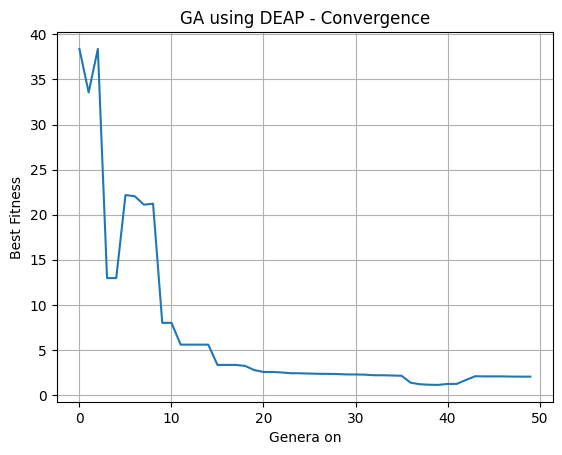

In [19]:
if __name__ == "__main__": 
    main() 
